# Preprocessing data

In [1]:
tables = ["attrs", "nofa", "nosfa", "sattrs", "cc"]

for table in tables:
    print(table)
    f_in = open(table+".csv", encoding="utf-8")
    f_out = open(table+"_fixed.csv", "w", encoding="utf-8")
    for line in f_in:
        split1 = line.find(",")
        split2 = line.rfind(",")
        f_out.write(line[:split1] + "," + line[split1+1:split2].replace(",", "") + "," + line[split2+1:] + "\n")
    f_in.close()
    f_out.close()

attrs
nofa
nosfa
sattrs
cc


In [2]:
import pandas as pd

frames = dict()

for table in tables:
    frames[table] = pd.read_csv(table+"_fixed.csv").drop_duplicates()
    frames[table]["repo"] = frames[table]["repo"].astype(pd.StringDtype())
    frames[table]["java_file"] = frames[table]["java_file"].astype(pd.StringDtype())
    frames[table].info()

<class 'pandas.core.frame.DataFrame'>
Index: 862446 entries, 0 to 863649
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   attrs      862446 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 26.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 862446 entries, 0 to 863649
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   nofa       862446 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 26.3 MB
<class 'pandas.core.frame.DataFrame'>
Index: 862446 entries, 0 to 863649
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   nosfa      862446 no

In [3]:
all_frame = frames[tables[0]].copy()
all_frame.info()
print("--------")
for table in tables[1:]:
    new_frame = frames[table].copy()
    all_frame = all_frame.merge(new_frame, on=["repo",	"java_file"], how="inner")
    all_frame.info()
# all_frame = all_frame.drop(columns=["joinkey"])
display(all_frame)

<class 'pandas.core.frame.DataFrame'>
Index: 862446 entries, 0 to 863649
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   attrs      862446 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 26.3 MB
--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862446 entries, 0 to 862445
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   attrs      862446 non-null  int64 
 3   nofa       862446 non-null  int64 
dtypes: int64(2), string(2)
memory usage: 26.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862446 entries, 0 to 862445
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   j

,repo,java_file,attrs,nofa,nosfa,sattrs,cc
0,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1
1,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,0,0,0,0,1
2,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1
3,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1
4,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,10,4,2,2,8
...,...,...,...,...,...,...,...
862441,magefree/mage,/Mage.Sets/src/mage/cards/c/CatapultSquad.java,0,1,1,1,1
862442,magefree/mage,/Mage.Sets/src/mage/cards/c/Clickslither.java,0,1,1,1,1
862443,magefree/mage,/Mage.Sets/src/mage/cards/c/CloudchaserEagle.java,0,0,0,0,1
862444,magefree/mage,/Mage.Sets/src/mage/cards/c/ChasmGuide.java,0,0,0,0,1


In [4]:
all_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862446 entries, 0 to 862445
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   repo       862446 non-null  string
 1   java_file  862446 non-null  string
 2   attrs      862446 non-null  int64 
 3   nofa       862446 non-null  int64 
 4   nosfa      862446 non-null  int64 
 5   sattrs     862446 non-null  int64 
 6   cc         862446 non-null  int64 
dtypes: int64(5), string(2)
memory usage: 46.1 MB


In [7]:
all_frame.to_csv("sqm_all_metrics.csv")

# Analysis

In [8]:
import pandas as pd
df = pd.read_csv("sqm_all_metrics.csv")

In [9]:
df.loc[:, "attrs_all"] = df["attrs"]+df["sattrs"]
df.loc[:, "nofa_ns"] = df["nofa"]-df["nosfa"]
df.loc[:, "fa_ratio"] = df["nofa"]/df["attrs_all"]
df.loc[:, "fa_ratio_ns"] = df["nofa_ns"]/df["attrs"]
df.loc[:, "mutable"] = df["attrs"] != df["nofa_ns"]

In [10]:
df.loc[:, "attrs":].corr()

,attrs,nofa,nosfa,sattrs,cc,attrs_all,nofa_ns,fa_ratio,fa_ratio_ns,mutable
attrs,1.000000,0.113510,0.089840,0.090907,0.487368,0.356812,0.337895,-0.089504,-0.046621,0.195082
nofa,0.113510,1.000000,0.997428,0.995434,0.166328,0.964600,0.125957,0.040721,0.107231,0.003012
nosfa,0.089840,0.997428,1.000000,0.997981,0.144402,0.960561,0.054535,0.025272,-0.006223,0.001362
sattrs,0.090907,0.995434,0.997981,1.000000,0.145948,0.962745,0.054703,0.023575,-0.006903,0.001288
cc,0.487368,0.166328,0.144402,0.145948,1.000000,0.269246,0.318527,0.000300,-0.020460,0.078854
attrs_all,0.356812,0.964600,0.960561,0.962745,0.269246,1.000000,0.143065,-0.001949,-0.035213,0.054180
nofa_ns,0.337895,0.125957,0.054535,0.054703,0.318527,0.143065,1.000000,0.220059,0.357662,0.023109
fa_ratio,-0.089504,0.040721,0.025272,0.023575,0.000300,-0.001949,0.220059,1.000000,0.919848,-0.809796
fa_ratio_ns,-0.046621,0.107231,-0.006223,-0.006903,-0.020460,-0.035213,0.357662,0.919848,1.000000,-0.890833
mutable,0.195082,0.003012,0.001362,0.001288,0.078854,0.054180,0.023109,-0.809796,-0.890833,1.000000


In [11]:
df


,Unnamed: 0,repo,java_file,attrs,nofa,nosfa,sattrs,cc,attrs_all,nofa_ns,fa_ratio,fa_ratio_ns,mutable
0,0,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1,1,0,0.000000,0.0,True
1,1,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,0,0,0,0,1,0,0,NaN,NaN,False
2,2,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1,1,0,0.000000,0.0,True
3,3,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,1,0,0,0,1,1,0,0.000000,0.0,True
4,4,Azure/azure-sdk-for-java,/sdk/mixedreality/azure-mixedreality-authentic...,10,4,2,2,8,12,2,0.333333,0.2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862441,862441,magefree/mage,/Mage.Sets/src/mage/cards/c/CatapultSquad.java,0,1,1,1,1,1,0,1.000000,NaN,False
862442,862442,magefree/mage,/Mage.Sets/src/mage/cards/c/Clickslither.java,0,1,1,1,1,1,0,1.000000,NaN,False
862443,862443,magefree/mage,/Mage.Sets/src/mage/cards/c/CloudchaserEagle.java,0,0,0,0,1,0,0,NaN,NaN,False
862444,862444,magefree/mage,/Mage.Sets/src/mage/cards/c/ChasmGuide.java,0,0,0,0,1,0,0,NaN,NaN,False


C:\Users\non-root\AppData\Local\Temp\ipykernel_7492\158190584.py:16: RuntimeWarning: divide by zero encountered in log
  heatmap2 = np.log(heatmap.T)


[Text(0, 0.0, '2.0'),
 Text(0, 125.0, '52.0'),
 Text(0, 250.0, '102.0'),
 Text(0, 375.0, '152.0'),
 Text(0, 500.0, '202.0')]

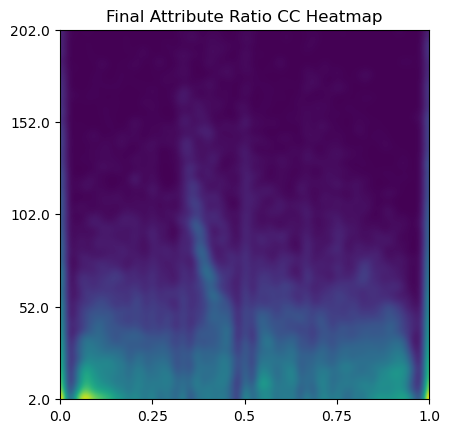

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.ndimage import gaussian_filter

def data_filter(x):
    return x[~df["fa_ratio"].isna()][df["cc"] > np.quantile(df["cc"], 0.01)][df["cc"] < np.quantile(df["cc"], 0.995)]

data_x = data_filter(df["fa_ratio"])
data_y = data_filter(df["cc"])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=500)
heatmap2 = np.log(heatmap.T)
heatmap2[heatmap.T == 0] = 0

heatmap2 = gaussian_filter(heatmap2, sigma=7)
fig, ax = plt.subplots()
ax.imshow(heatmap2, origin='lower')
ax.set_title("Final Attribute Ratio CC Heatmap")
ax.set_xticks(np.linspace(0, 500, 5))
ax.set_yticks(np.linspace(0, 500, 5))
ax.set_xticklabels(np.linspace(0, 1, 5))
ax.set_yticklabels(np.linspace(yedges[0], yedges[-1], 5))

C:\Users\non-root\AppData\Local\Temp\ipykernel_7492\3782257568.py:11: RuntimeWarning: divide by zero encountered in log
  heatmap2 = np.log(heatmap.T)


[Text(0, 0.0, '2.0'),
 Text(0, 125.0, '52.0'),
 Text(0, 250.0, '102.0'),
 Text(0, 375.0, '152.0'),
 Text(0, 500.0, '202.0')]

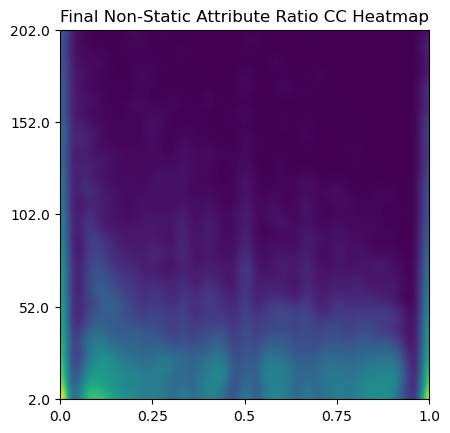

In [13]:
def data_filter(x):
    return x[~df["fa_ratio_ns"].isna()][df["cc"] > np.quantile(df["cc"], 0.01)][df["cc"] < np.quantile(df["cc"], 0.995)]

data_x = data_filter(df["fa_ratio_ns"])
data_y = data_filter(df["cc"])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

heatmap, xedges, yedges = np.histogram2d(data_x, data_y, bins=500)
heatmap2 = np.log(heatmap.T)
heatmap2[heatmap.T == 0] = 0

heatmap2 = gaussian_filter(heatmap2, sigma=7)

heatmap2 = gaussian_filter(heatmap2, sigma=7)
fig, ax = plt.subplots()
plt.imshow(heatmap2, origin='lower')
ax.set_title("Final Non-Static Attribute Ratio CC Heatmap")
ax.set_xticks(np.linspace(0, 500, 5))
ax.set_yticks(np.linspace(0, 500, 5))
ax.set_xticklabels(np.linspace(0, 1, 5))
ax.set_yticklabels(np.linspace(yedges[0], yedges[-1], 5))

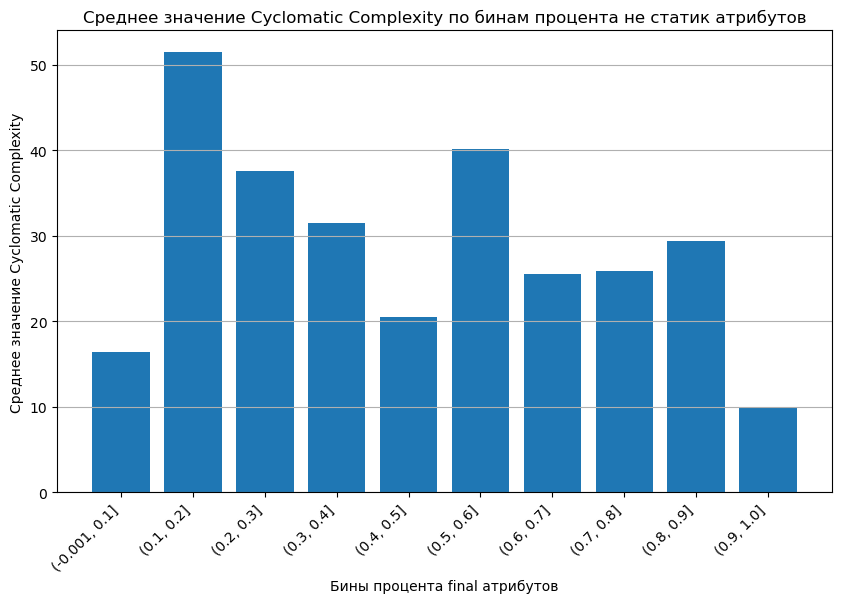

In [14]:
num_bins = 10
df['bin'] = pd.cut(df['fa_ratio_ns'], bins=num_bins)

# Группируем данные по бинам и вычисляем среднее значение для cyclomatic complexity
avg_complexity_by_bin = df.groupby('bin')['cc'].mean().reset_index()

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(avg_complexity_by_bin['bin'].astype(str), avg_complexity_by_bin['cc'])
plt.title('Среднее значение Cyclomatic Complexity по бинам процента не статик атрибутов')
plt.xlabel('Бины процента final атрибутов')
plt.ylabel('Среднее значение Cyclomatic Complexity')
plt.xticks(rotation=45, ha='right')  # Возможно, потребуется повернуть подписи бинов для лучшей читаемости
plt.grid(axis='y')
plt.show()

In [15]:
df[df["attrs_all"] == df["nofa"]]["cc"].mean()

6.076091224569931

In [16]:
print("immutable count\t\t", len(df[df["attrs"] == df["nofa_ns"]]["cc"]))
print("mutable count\t\t",len(df[df["attrs"] != df["nofa_ns"]]["cc"]))

print("immutable cc mean\t", df[df["attrs"] == df["nofa_ns"]]["cc"].mean())
print("mutable cc mean\t\t",df[df["attrs"] != df["nofa_ns"]]["cc"].mean())

print("immutable cc median\t", df[df["attrs"] == df["nofa_ns"]]["cc"].median())
print("mutable cc median\t",df[df["attrs"] != df["nofa_ns"]]["cc"].median())

immutable count		 493382
mutable count		 369064
immutable cc mean	 6.527110839065876
mutable cc mean		 19.825482843084128
immutable cc median	 2.0
mutable cc median	 5.0


In [18]:
print("static-immutable count\t\t", len(df[df["attrs_all"] == df["nofa"]]["cc"]))
print("static-mutable count\t\t",len(df[df["attrs_all"] != df["nofa"]]["cc"]))

print("static-immutable cc mean\t", df[df["attrs_all"] == df["nofa"]]["cc"].mean())
print("static-mutable cc mean\t\t",df[df["attrs_all"] != df["nofa"]]["cc"].mean())

print("static-immutable cc median\t", df[df["attrs"] == df["nofa"]]["cc"].median())
print("static-mutable cc median\t",df[df["attrs_all"] != df["nofa"]]["cc"].median())

static-immutable count		 471145
static-mutable count		 391301
static-immutable cc mean	 6.076091224569931
static-mutable cc mean		 19.61280702068229
static-immutable cc median	 2.0
static-mutable cc median	 5.0
